# Feature Selection

sources:
- https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

# Add: results of:
- AFC (Asia)
- CAF (Africa)
- CONCACAF (North America, Central America and the Caribbean)
- CONMEBOL (South America)
- OFC (Oceania)
- UEFA (Europe)

source for 2018 qualifitcations:
- https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_qualification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('FIFA - World Cup Summary.csv')

In [3]:
df

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4
5,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6
6,1962,Chile,Brazil,Czechoslovakia,Chile,16,32,89,2.8
7,1966,England,England,West Germany,Portugal,16,32,89,2.8
8,1970,Mexico,Brazil,Italy,West Germany,16,32,95,3.0
9,1974,West Germany,West Germany,Netherlands,Poland,16,38,97,2.6


In [4]:
df['GOALS SCORED'].sum() / df['MATCHES PLAYED'].sum()

2.837416481069042

In [5]:
df.loc[11:, 'GOALS SCORED'].sum() / df.loc[11:, 'MATCHES PLAYED'].sum()

2.5304054054054053

In [6]:
df82 =pd.read_csv('FIFA - 1982.csv')

In [7]:
df86 = pd.read_csv('FIFA - 1986.csv')

In [8]:
df90 = pd.read_csv('FIFA - 1990.csv')

In [9]:
df94 = pd.read_csv('FIFA - 1994.csv')

In [10]:
df98 = pd.read_csv('FIFA - 1998.csv')

In [11]:
df02 = pd.read_csv('FIFA - 2002.csv')

In [12]:
df06 = pd.read_csv('FIFA - 2006.csv')

In [13]:
df10 = pd.read_csv('FIFA - 2010.csv')

In [14]:
df14 = pd.read_csv('FIFA - 2014.csv')

In [15]:
df18 = pd.read_csv('FIFA - 2018.csv')

In [16]:
dfs = [df82, df86, df90, df94, df98, df02, df06, df10, df14, df18]

In [17]:
wcs = pd.concat(dfs)

In [18]:
wcs.head()

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Italy,7,4,3,0,12,6,6,11
1,2,West Germany,7,3,2,2,12,10,2,8
2,3,Poland,7,3,3,1,11,5,6,9
3,4,France,7,3,2,2,16,12,4,8
4,5,Brazil,5,4,0,1,15,6,9,8


In [19]:
wcs1 = wcs.sort_values(by=['Position'])

In [20]:
wcw = wcs.sort_values(by=['Win'], ascending=False)

In [21]:
wcp = wcs.sort_values(by=['Points'], ascending=False)

In [22]:
top20 = wcs1.head(20)

In [23]:
top20

,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points
0,1,Italy,7,4,3,0,12,6,6,11
0,1,Brazil,7,7,0,0,18,4,14,21
0,1,Spain,7,6,0,1,8,2,6,18
0,1,France,7,6,1,0,15,2,13,19
0,1,Germany,7,6,1,0,18,4,14,19
0,1,Brazil,7,5,2,0,11,3,8,17
0,1,West Germany,7,5,2,0,15,5,10,12
0,1,France,7,6,1,0,14,6,8,19
0,1,Argentina,7,6,1,0,14,5,9,13
0,1,Italy,7,5,2,0,12,2,10,17


## Correlation Coefficient

In [24]:
corrwcs = wcs.corr()

In [25]:
# library imports
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

<AxesSubplot:>

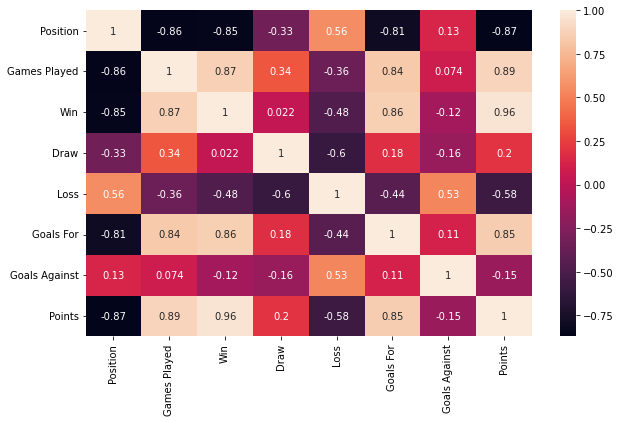

In [26]:
plt.figure(figsize = (10, 6))
sns.heatmap(corrwcs, annot = True)

In [27]:
corrwcs

,Position,Games Played,Win,Draw,Loss,Goals For,Goals Against,Points
Position,1.000000,-0.861980,-0.854953,-0.329489,0.559591,-0.805271,0.134375,-0.871322
Games Played,-0.861980,1.000000,0.867320,0.337309,-0.358319,0.835907,0.073800,0.886783
Win,-0.854953,0.867320,1.000000,0.021834,-0.483140,0.858645,-0.115462,0.960725
Draw,-0.329489,0.337309,0.021834,1.000000,-0.598714,0.175307,-0.157484,0.201252
Loss,0.559591,-0.358319,-0.483140,-0.598714,1.000000,-0.436935,0.525474,-0.576849
Goals For,-0.805271,0.835907,0.858645,0.175307,-0.436935,1.000000,0.112330,0.849035
Goals Against,0.134375,0.073800,-0.115462,-0.157484,0.525474,0.112330,1.000000,-0.150931
Points,-0.871322,0.886783,0.960725,0.201252,-0.576849,0.849035,-0.150931,1.000000


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_38215/3442300642.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

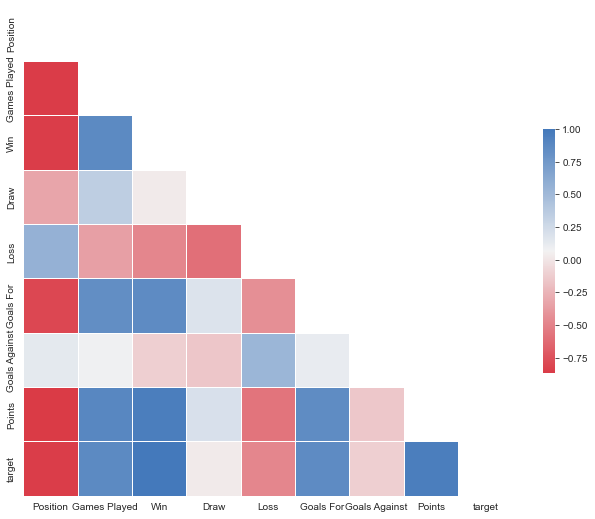

In [28]:
wcs['target'] = wcs['Win']
wcs.head()# use the pands .corr() function to compute pairwise correlations for the dataframe

corr = wcs.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Fisher’s Score - Not working

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [33]:
# from skfeature.function.similarity_based import fisher_score
# # 

In [35]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_dfTest, predict_lda))

## Chi-square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2